<a href="https://colab.research.google.com/github/sureshkumaroffl/FinalProjectGuvi/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import r2_score

# Data Cleaning

In [287]:
df=pd.read_csv('https://raw.githubusercontent.com/sureshkumaroffl/FinalProjectGuvi/main/train.csv')
# df

In [288]:
print(df.shape,df.isnull().values.any())
# df.dtypes
# df.isnull().sum()
# df.isnull().values.any()
# df["job"].unique()
# df.describe()

(45211, 11) False


In [289]:
# df.loc[df["job"]=="unknown","job"]=df.loc[df["job"]=="unknown","job"].replace("unknown","Mayava")

In [290]:
df.loc[(df["job"]=="admin."),"job"]=df.loc[(df["job"]=="admin."),"job"].replace("admin.","admin")

In [291]:
pd.crosstab(df["education_qual"],df["job"])

job,admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education_qual,,,,,,,,,,,,
primary,209,3758,183,627,294,795,130,345,44,158,257,51
secondary,4219,5371,542,395,1121,984,577,3457,508,5229,728,71
tertiary,572,149,686,173,7801,366,833,202,223,1968,289,39
unknown,171,454,76,45,242,119,39,150,163,242,29,127


**Job column filled based on Education column**

In [292]:
df.loc[(df["job"]=="unknown") & (df["education_qual"]=="primary"),"job"]=df.loc[(df["job"]=="unknown") & (df["education_qual"]=="primary"),"job"].replace("unknown","blue-collar")

In [293]:
df.loc[(df["job"]=="unknown") & (df["education_qual"]=="secondary"),"job"]=df.loc[(df["job"]=="unknown") & (df["education_qual"]=="secondary"),"job"].replace("unknown","blue-collar")

In [294]:
df.loc[(df["job"]=="unknown") & (df["education_qual"]=="tertiary"),"job"]=df.loc[(df["job"]=="unknown") & (df["education_qual"]=="tertiary"),"job"].replace("unknown","management")

**Education column filled based on Job column**

In [295]:
df.loc[(df["job"]=="admin") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="admin") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","secondary")

In [296]:
df.loc[(df["job"]=="blue-collar") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="blue-collar") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","secondary")

In [297]:
df.loc[(df["job"]=="entrepreneur") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="entrepreneur") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","tertiary")

In [298]:
df.loc[(df["job"]=="housemaid") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="housemaid") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","primary")

In [299]:
df.loc[(df["job"]=="management") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="management") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","tertiary")

In [300]:
df.loc[(df["job"]=="retired") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="retired") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","secondary")

In [301]:
df.loc[(df["job"]=="self-employed") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="self-employed") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","tertiary")

In [302]:
df.loc[(df["job"]=="self-employed") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="self-employed") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","tertiary")

In [303]:
df.loc[(df["job"]=="services") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="services") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","secondary")

In [304]:
df.loc[(df["job"]=="student") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="student") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","secondary")

In [305]:
df.loc[(df["job"]=="technician") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="technician") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","secondary")

In [306]:
df.loc[(df["job"]=="unemployed") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="unemployed") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","secondary")

**Unknown Job & Unknown Education data filled on minumum levals(Unemployed & Primary) of Job & Education Columns**

In [307]:
df.loc[(df["job"]=="unknown") & (df["education_qual"]=="unknown"),"job"]=df.loc[(df["job"]=="unknown") & (df["education_qual"]=="unknown"),"job"].replace("unknown","unemployed")

In [308]:
df.loc[(df["job"]=="unemployed") & (df["education_qual"]=="unknown"),"education_qual"]=df.loc[(df["job"]=="unemployed") & (df["education_qual"]=="unknown"),"education_qual"].replace("unknown","primary")

In [309]:
pd.crosstab(df["education_qual"],df["job"])

job,admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
education_qual,,,,,,,,,,,
primary,209,3809,183,672,294,795,130,345,44,158,384
secondary,4390,5896,542,395,1121,1103,577,3607,671,5471,757
tertiary,572,149,762,173,8082,366,872,202,223,1968,289


**People mostly used cellular. So Call Type values replaced for unknown to cellular**

In [310]:
pd.crosstab(df['call_type'],df['call_type'])

call_type,cellular,telephone,unknown
call_type,,,
cellular,29285,0,0
telephone,0,2906,0
unknown,0,0,13020


In [311]:
df.loc[(df["call_type"]=="unknown") ,"call_type"]=df.loc[(df["call_type"]=="unknown") ,"call_type"].replace('unknown','cellular')

**Prev outcome column filled based on y column**

In [312]:
df.loc[(df["prev_outcome"]=="unknown") & (df["y"]=="yes"),"prev_outcome"]=df.loc[(df["prev_outcome"]=="unknown") & (df["y"]=="yes"),"prev_outcome"].replace("unknown","success")

In [313]:
df.loc[(df["prev_outcome"]=="unknown") & (df["y"]=="no"),"prev_outcome"]=df.loc[(df["prev_outcome"]=="unknown") & (df["y"]=="no"),"prev_outcome"].replace("unknown","failure")

In [314]:
pd.crosstab(df['prev_outcome'],df['y'])

y,no,yes
prev_outcome,,
failure,37856,618
other,1533,307
success,533,4364


In [315]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,cellular,5,may,261,1,failure,no
1,44,technician,single,secondary,cellular,5,may,151,1,failure,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,failure,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,failure,no
4,33,unemployed,single,primary,cellular,5,may,198,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,success,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,success,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,failure,no


#EDA Analysis

<ipython-input-317-1f2494101416>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

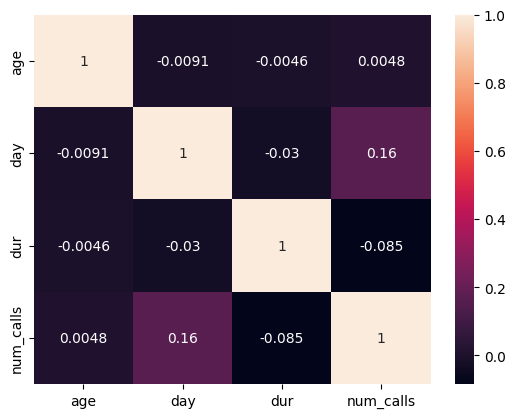

In [317]:
# fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [318]:
# Succuss customer data
yCusDf=df.loc[(df['y']=='yes'),:]

In [319]:
yCusDf.shape

(5289, 11)

<Axes: title={'center': 'Best age group for loan'}, xlabel='Age', ylabel='Count'>

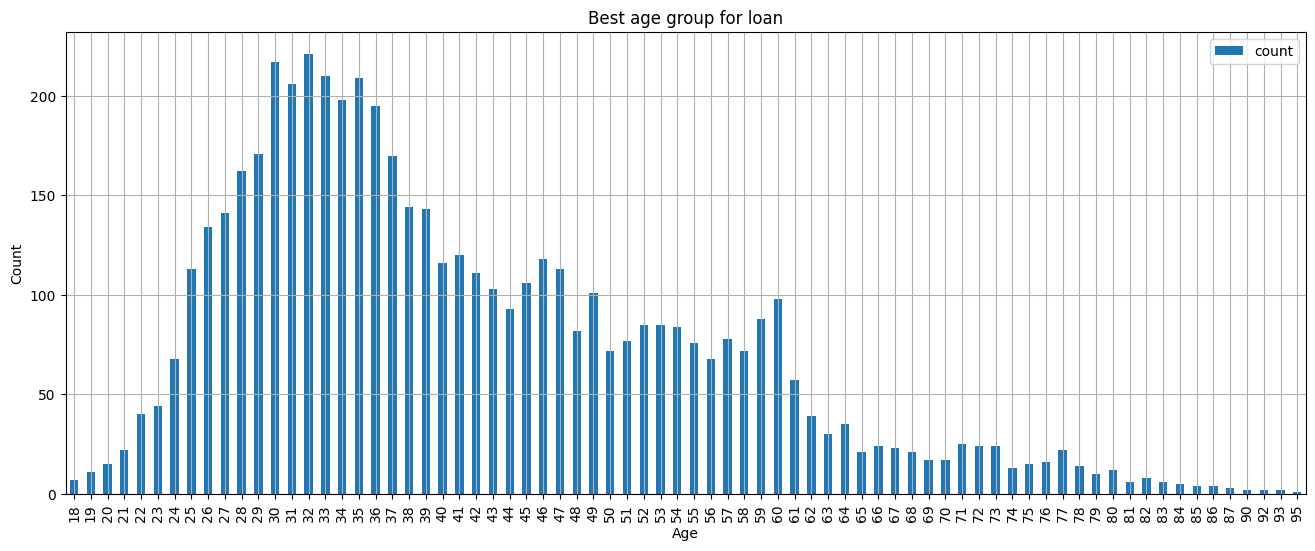

In [320]:
ageFilt=yCusDf.groupby(['age'])['y'].agg(['count'])
# ageFilt
ageFilt.plot(kind='bar', title='Best age group for loan', ylabel='Count',xlabel='Age', figsize=(16,6),grid=True)

In [321]:
ageFilt.idxmax()

count    32
dtype: int64

<Axes: title={'center': 'Which job people maximum get a loan'}, ylabel='y'>

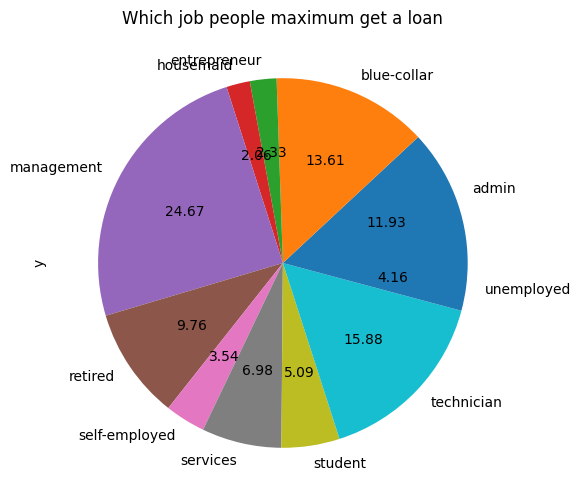

In [322]:
# Which job people maximum get a loan
jobFilt=yCusDf.groupby(df['job'])['y'].agg('count')
jobFilt.plot(kind='pie', title='Which job people maximum get a loan',autopct='%.2f',figsize=(16,6))

<Axes: title={'center': 'Married or Unmarried people maximum get a loan'}, ylabel='y'>

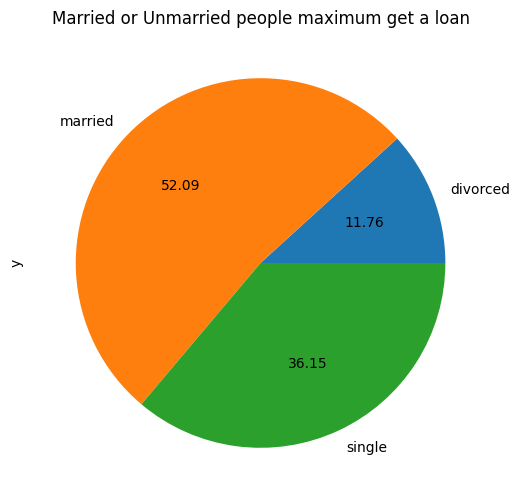

In [323]:
#Married or Unmarried people maximum get a loan
marFilt=yCusDf.groupby('marital')['y'].agg('count')
marFilt.plot(kind='pie', title='Married or Unmarried people maximum get a loan',autopct='%.2f',figsize=(16,6))

<Axes: title={'center': 'Education & Job based loan getter'}, xlabel='Education & Job', ylabel='Count'>

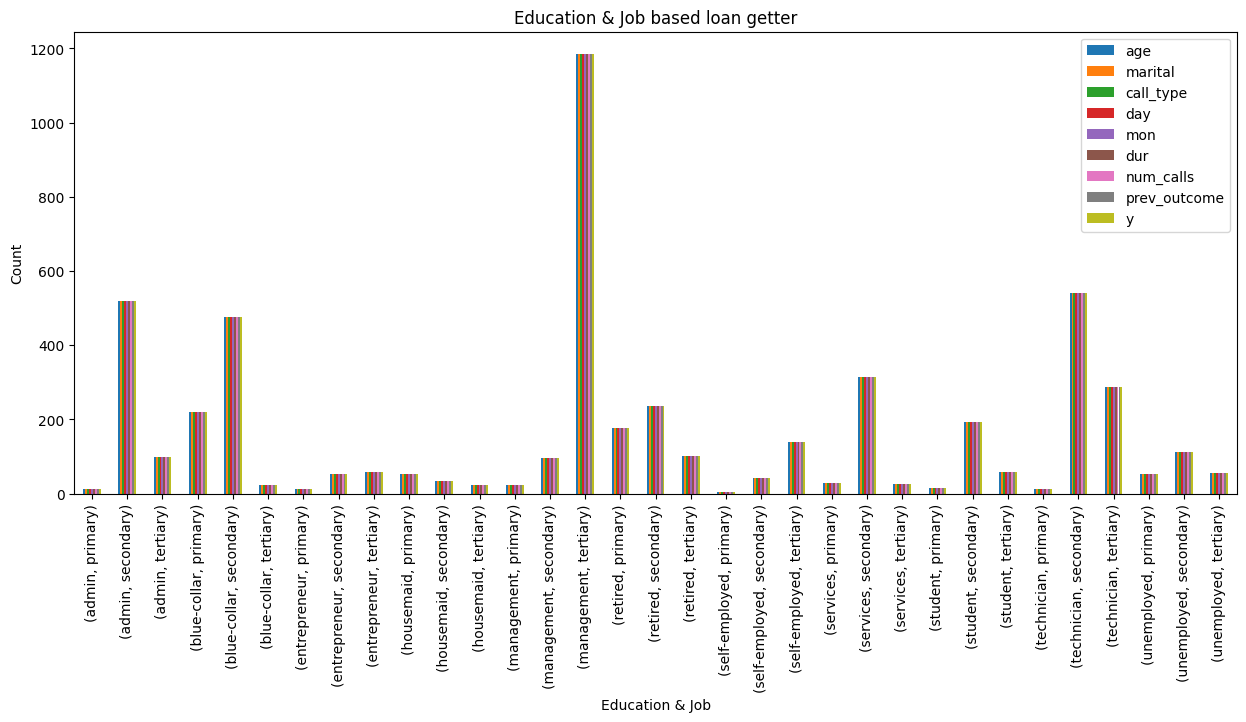

In [324]:
# Education
jobEduFilt=yCusDf.groupby(['job','education_qual']).count()
jobEduFilt.plot(kind='bar', title='Education & Job based loan getter',xlabel='Education & Job', ylabel='Count',figsize=(15,6),grid=False)


<Axes: title={'center': 'Number of call based loan getter'}, xlabel='Number of calls', ylabel='Count'>

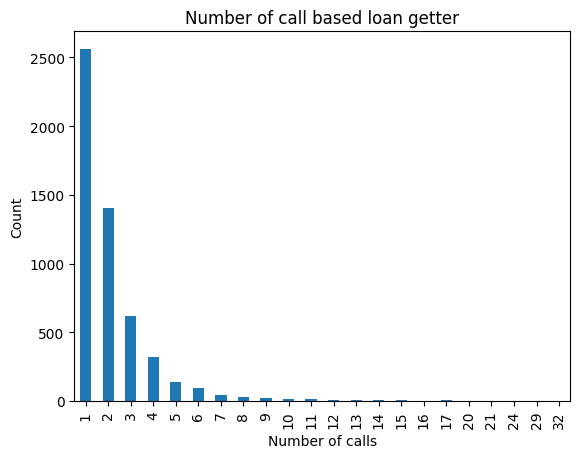

In [325]:
# Number of call based loan getter
numCall=yCusDf.groupby("num_calls")['y'].agg('count')
numCall.plot(kind='bar',title='Number of call based loan getter',xlabel='Number of calls', ylabel='Count')

<Axes: title={'center': 'Day based loan getter'}, xlabel='Day', ylabel='Count'>

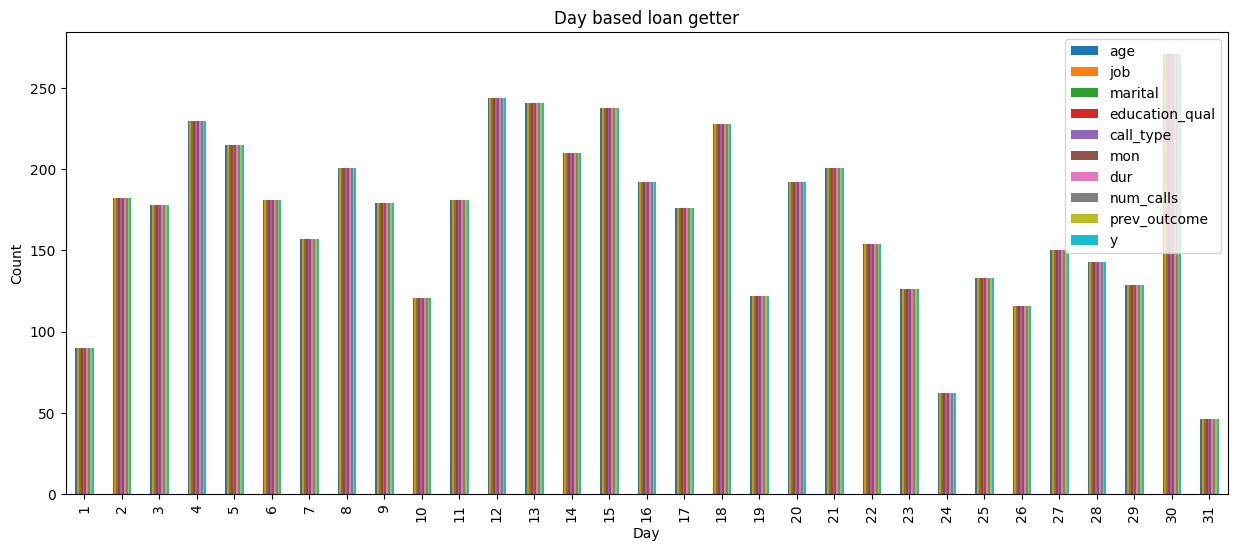

In [326]:
# Day based loan getter
dayFilt=yCusDf.groupby(['day']).count()
dayFilt.plot(kind='bar',title='Day based loan getter',xlabel='Day', ylabel='Count',figsize=(15,6),grid=False)


<Axes: title={'center': 'Month based loan getter'}, xlabel='Month', ylabel='Count'>

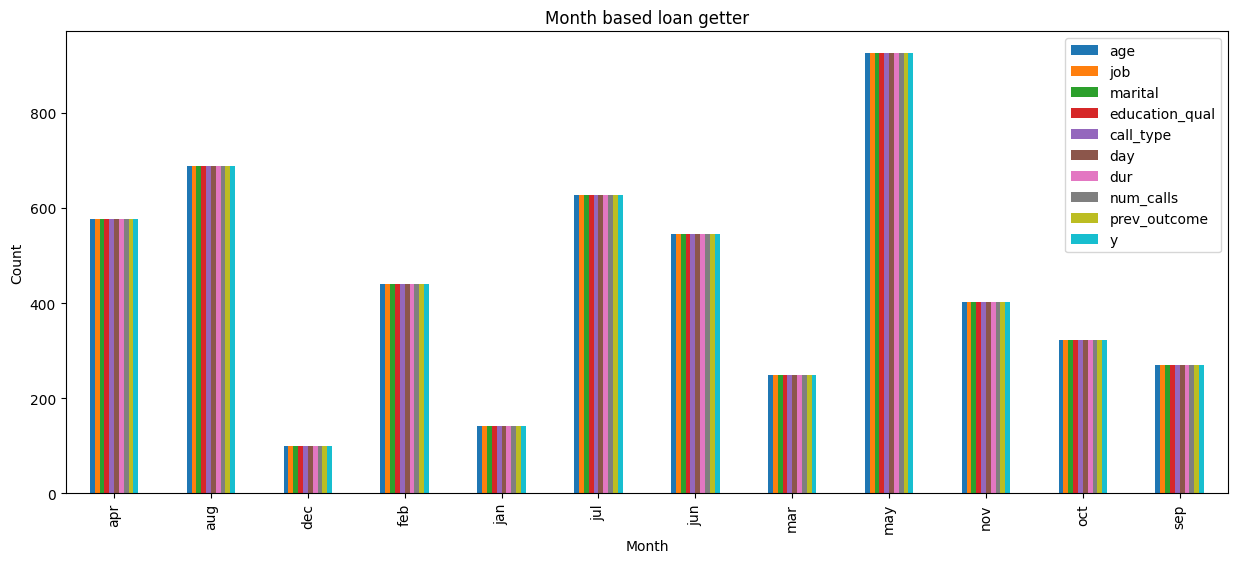

In [327]:
# Mon based loan getter
monFilt=yCusDf.groupby(['mon']).count()
monFilt.plot(kind='bar',title='Month based loan getter',xlabel='Month', ylabel='Count',figsize=(15,6),grid=False)

<Axes: title={'center': 'Previews based loan getter'}, xlabel='Previews Outcome', ylabel='Count'>

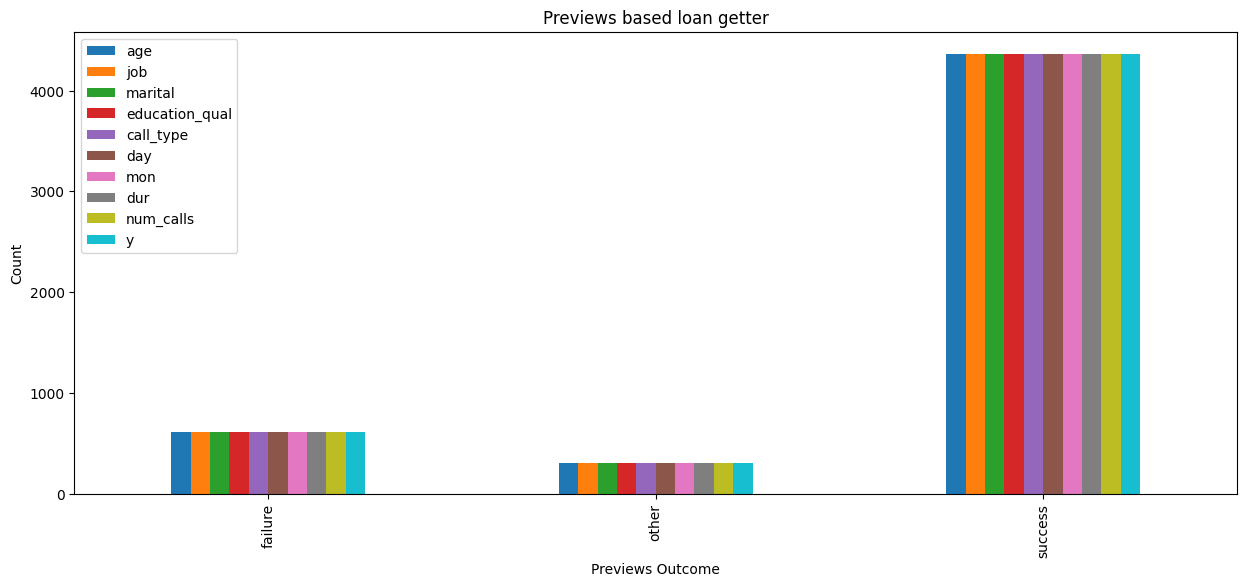

In [328]:
# Previews based loan getter
preFilt=yCusDf.groupby(['prev_outcome']).count()
preFilt.plot(kind='bar',title='Previews based loan getter',xlabel='Previews Outcome', ylabel='Count',figsize=(15,6),grid=False)

<Axes: title={'center': 'Duration based loan getter'}, xlabel='Previews Outcome', ylabel='Count'>

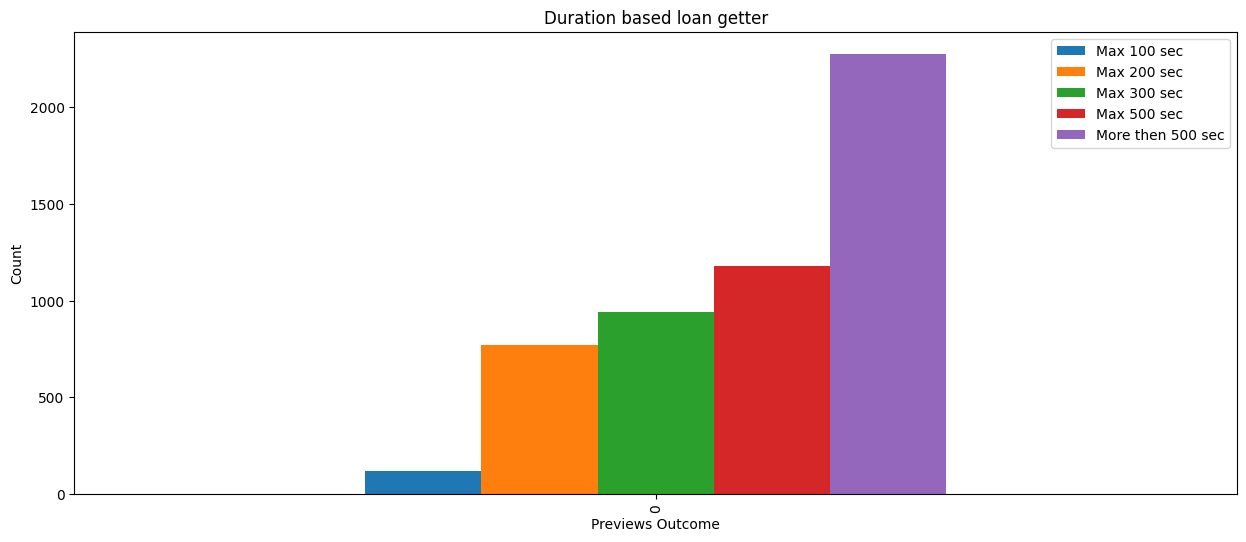

In [329]:
leval1=yCusDf.loc[(yCusDf['dur']>=0) & (yCusDf['dur']<=100),'dur'].count()
leval2=yCusDf.loc[(yCusDf['dur']>=101) & (yCusDf['dur']<=200),'dur'].count()
leval3=yCusDf.loc[(yCusDf['dur']>=201) & (yCusDf['dur']<=300),'dur'].count()
leval4=yCusDf.loc[(yCusDf['dur']>=301) & (yCusDf['dur']<=500),'dur'].count()
leval5=yCusDf.loc[(yCusDf['dur']>=501),'dur'].count()
s=pd.DataFrame([[leval1,leval2,leval3,leval4,leval5]],columns=['Max 100 sec','Max 200 sec','Max 300 sec','Max 500 sec','More then 500 sec'])
s.plot(kind='bar',title='Duration based loan getter',xlabel='Previews Outcome', ylabel='Count',figsize=(15,6),grid=False)


#Hypothesis Analysis

In [330]:
# Label Encoding
def labEncode(GetVal):
  EncoVal=GetVal.apply(preprocessing.LabelEncoder().fit_transform)
  return EncoVal

# Data Distributions Normal or not
def distrCheck(DistVal):
  static_val,p_val=stats.shapiro(DistVal)
  if p_val>0.05:
    return ('Normal Distribution(Fail to reject)',p_val)
  else:
    return ('Not normal Distribution(reject)',p_val)

# Homogenetity test (2 Group same or Not)
def HomoGenCheck(GenVal1,GenVal2):
  stats_val,p_l_val=stats.levene(GenVal1,GenVal2)
  if p_l_val>0.05:
    return ('Fail to reject (It is same group)',p_l_val)
  else:
    return ('Reject (It not a is same group)',p_l_val)

def hypTest(GetHyp):
  if GetHyp < 0.05:
    return ('Reject to null hypothesis',GetHyp)
  else:
    return ('Fail to reject',GetHyp)

In [331]:
df_Numeric=df[['age','day','dur','num_calls']]
df_cat=df[['job','marital','education_qual','call_type','mon','prev_outcome','y']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8770420340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f876c3bc970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f87ba0397b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f876c3bceb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f876c3bd0c0>,
 'means': []}

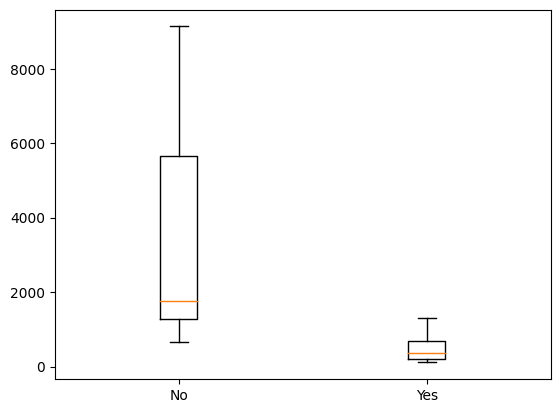

In [332]:
JvsE=pd.crosstab(df_cat['job'],df_cat['y'])
stsvl=stats.chi2_contingency(JvsE)
hypTest(stsvl.pvalue)
plt.boxplot(x=JvsE,labels=['No','Yes',])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f876c40f2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f876c40f820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f876c40f040>,
 'medians': [<matplotlib.lines.Line2D at 0x7f876c40fd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f876c444040>,
 'means': []}

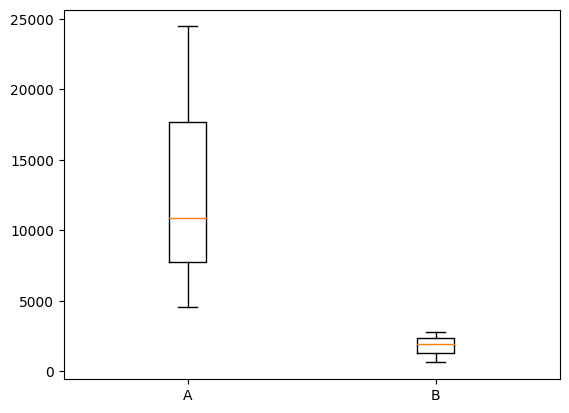

In [333]:
MvsE=pd.crosstab(df_cat['marital'],df_cat['y'])
stsvl=stats.chi2_contingency(MvsE)
hypTest(stsvl.pvalue)
plt.boxplot(x=MvsE,labels=['A','B'])

In [334]:
age1=yCusDf[yCusDf['job']=='management']['age']
age2=yCusDf[yCusDf['job']=='services']['age']
age3=yCusDf[yCusDf['job']=='entrepreneur']['age']
ageTes=stats.f_oneway(age1,age2,age3)
hypTest(ageTes.pvalue)

('Reject to null hypothesis', 6.486835883529328e-07)

#ML Training

In [335]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,cellular,5,may,261,1,failure,no
1,44,technician,single,secondary,cellular,5,may,151,1,failure,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,failure,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,failure,no
4,33,unemployed,single,primary,cellular,5,may,198,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,success,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,success,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,failure,no


In [336]:
dfEn=labEncode(df)
xE = dfEn.iloc[:, :-1].values
yE = dfEn.iloc[:,-1].values

In [337]:
X_train, X_test, y_train, y_test = train_test_split(xE, yE, test_size=0.3, random_state=0)

**Linear Regression**

In [338]:
LinModel = LinearRegression()
LinModel.fit(X_train, y_train)

LinearRegression()

In [339]:
LinModel.predict([[40,4,1,2,0,4,8,261,0,0]])
# LinModel.predict([[26,	9	,2	,1	,0	,4	,8	,151	,0	,0]])

array([0.0315292])

In [340]:
Lin_Pred=LinModel.predict(X_test)

In [341]:
# Error Calculation
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, Lin_Pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, Lin_Pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, Lin_Pred)))

Mean Absolute Error: 0.07603774971178048
Mean Squared Error: 0.03283180270888802
Root Mean Squared Error: 0.1811954820322185


In [342]:
# Accuracy Calculation
print('Accuracy:',1-np.sqrt(metrics.mean_squared_error(y_test, Lin_Pred)))

Accuracy: 0.8188045179677815


**Logistic Regression**

In [343]:
LogModel = LogisticRegression()
LogModel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [344]:
# LogModel.predict([[40,4,1,2,0,4,8,261,0,0]])
LogModel.predict([[33	,9,1,2,0,16,9,975,2,2	]])

array([1])

In [345]:
Log_Pred=LinModel.predict(X_test)

In [346]:
# Error Calculation
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, Log_Pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, Log_Pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, Log_Pred)))

Mean Absolute Error: 0.07603774971178048
Mean Squared Error: 0.03283180270888802
Root Mean Squared Error: 0.1811954820322185


In [347]:
# Accuracy Calculation
print('Accuracy:',1-np.sqrt(metrics.mean_squared_error(y_test, Log_Pred)))

Accuracy: 0.8188045179677815


**KNeighbors Classifier**

In [348]:
KNN_Model=KNeighborsClassifier(n_neighbors=2)
KNN_Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [349]:
KNN_Model.predict([[33,4,1,2,0,4,8,561,0,0]])
# KNN_Model.predict([[33	,9,1,2,0,16,9,975,2,2	]])

array([0])

In [350]:
KNN_Pred=KNN_Model.predict(X_test)

In [351]:
# Error Calculation
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, KNN_Pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, KNN_Pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, KNN_Pred)))

Mean Absolute Error: 0.1161161899144795
Mean Squared Error: 0.1161161899144795
Root Mean Squared Error: 0.34075825729463916


In [352]:
# Accuracy Calculation
print('Accuracy:',1-np.sqrt(metrics.mean_squared_error(y_test, KNN_Pred)))

Accuracy: 0.6592417427053608


**SVM Classifier**

In [353]:
SVM_Model = svm.SVC(kernel='rbf')
SVM_Model.fit(X_train, y_train)

SVC()

In [354]:
SVM_Model.predict([[33,4,1,2,0,4,8,561,0,0]])
# SVM_Model.predict([[33	,9,1,2,0,16,9,975,2,2	]])

array([0])

In [355]:
SVM_Pred = SVM_Model.predict(X_test)

In [356]:
# Error Calculation
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, SVM_Pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, SVM_Pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, SVM_Pred)))

Mean Absolute Error: 0.11287230905337658
Mean Squared Error: 0.11287230905337658
Root Mean Squared Error: 0.3359647437654383


In [357]:
# Accuracy Calculation
print('Accuracy:',1-np.sqrt(metrics.mean_squared_error(y_test, SVM_Pred)))

Accuracy: 0.6640352562345617


**Decision tree Classifier**


In [358]:
Dec_Model= DecisionTreeClassifier(criterion="gini", max_depth = 4)
Dec_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [359]:
# Dec_Model.predict([[33,4,1,2,0,4,8,561,0,0]])
Dec_Model.predict([[33	,9,1,2,0,16,9,975,2,2	]])

array([1])

In [360]:
Dec_Model = SVM_Model.predict(X_test)

In [361]:
# Error Calculation
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, Dec_Model))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, Dec_Model))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, Dec_Model)))

Mean Absolute Error: 0.11287230905337658
Mean Squared Error: 0.11287230905337658
Root Mean Squared Error: 0.3359647437654383


In [362]:
# Accuracy Calculation
print('Accuracy:',1-np.sqrt(metrics.mean_squared_error(y_test, Dec_Model)))

Accuracy: 0.6640352562345617


**K-Mean Classifier unsupervised algorithm**

In [363]:
Kmean_Model = KMeans(n_clusters = 2, random_state=3)
Kmean_Model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=3)

In [364]:
centers = Kmean_Model.cluster_centers_
pd.DataFrame(centers)

,0,1,2,3,4,5,6,7,8,9
0,22.939755,4.318367,1.166746,1.147629,0.066581,14.850247,5.525618,177.317634,1.792053,0.178429
1,22.697605,4.269922,1.175495,1.145555,0.055274,14.607094,5.567250,740.882773,1.481806,0.755412


In [365]:
# Practices Codes
# print(df.loc[(df["education_qual"]!="unknown") & (df["education_qual"]=="tertiary"),"job"].count())
# print(df.loc[(df["education_qual"]!="unknown") & (df["education_qual"]=="secondary"),"job"].count())
# print(df.loc[(df["education_qual"]!="unknown") & (df["education_qual"]=="primary"),"job"].count())
# pd.crosstab(df["job"],all,dropna=False)
# df.loc[(df["job"]=="unknown") & (df["education_qual"]=="unknown"),"education_qual"].count()
# gps1=df.groupby("job").count()
# # gps1.first()
# gps1
# df = df.replace(np.NaN, "unknown")
# gps1=df.groupby("job")
# # gps1.first()
# gps1.get_group("blue-collar")
# df.groupby(['job','education_qual']).agg({'education_qual': 'count'})
# df.loc[(df["job"]=="unknown") & (df["education_qual"]=="unknown"),"job"].count()



# crtab=pd.crosstab(yCusDf['day'],yCusDf['mon'])
# # MnM=crtab.idxmax()
# crtab.plot(kind='bar',figsize=(20,6),grid=True)
# # dayFiltssm=crtab.groupby(['mon']).count()
# # crtab.plot(kind='scatter',x='mon',y='day',s=yCusDf['age'])
# # crtab.style.highlight_max(color = 'lightgreen', axis = 1)
# pd.crosstab(df['age'],df['age'])<100)==True
# x=df.loc[df.groupby(['y']).agg(['count']),['age','y']]
# x
# df.loc[(df['y']=='yes'),:]
# yCusDf.loc[yCusDf['num_calls']==3].count()
# sns.heatmap(pd.crosstab(yCusDf['day'],yCusDf['mon']),annot=True)
# m=yCusDf.groupby(df['age'])['num_calls']
# for i in m:
#   print(i)
# # m.plot(kind='box', vert=False,figsize=(15,6))


# oHe = OneHotEncoder(handle_unknown='ignore')
# onEncode=pd.DataFrame(oHe.fit_transform(m[['mon','call_type']]).toarray())